In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pylab import rcParams
import pylab

In [2]:
rcParams['figure.figsize'] = (15, 10)
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['axes.titlesize'] = 20

In [3]:
data = pd.read_csv('/Users/Stanislav/Downloads/master.csv')

In [4]:
data.columns = ['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k_pop', 'country-year', 'HDI_for_year',
       'gdp_for_year', 'gdp_per_capita', 'generation']

## 0. My own exercises

In [5]:
data.sex.replace(['male', 'female'], [1, 0], inplace=True) 

In [6]:
j4 = list()
for i in data.sex.unique():
    for year in sorted(data.year.unique()):
        selector_n3 = (data.year == year) & (data.sex == i)
        b = np.mean(data[selector_n3]['suicides/100k_pop'])
        j4.append([year, i, b,])
j4_data = pd.DataFrame(j4, columns=['year', 'sex', 'suic rate'])

In [7]:
j4_data_male = j4_data.iloc[0:32,:]

In [8]:
j4_data_female = j4_data.iloc[32:64, :]

In [9]:
j4_data

,year,sex,suic rate
0,1985,1,17.875486
1,1986,1,17.033993
2,1987,1,17.556296
3,1988,1,19.095408
4,1989,1,19.581314
...,...,...,...
59,2012,0,4.521626
60,2013,0,4.366208
61,2014,0,4.458803
62,2015,0,4.653468


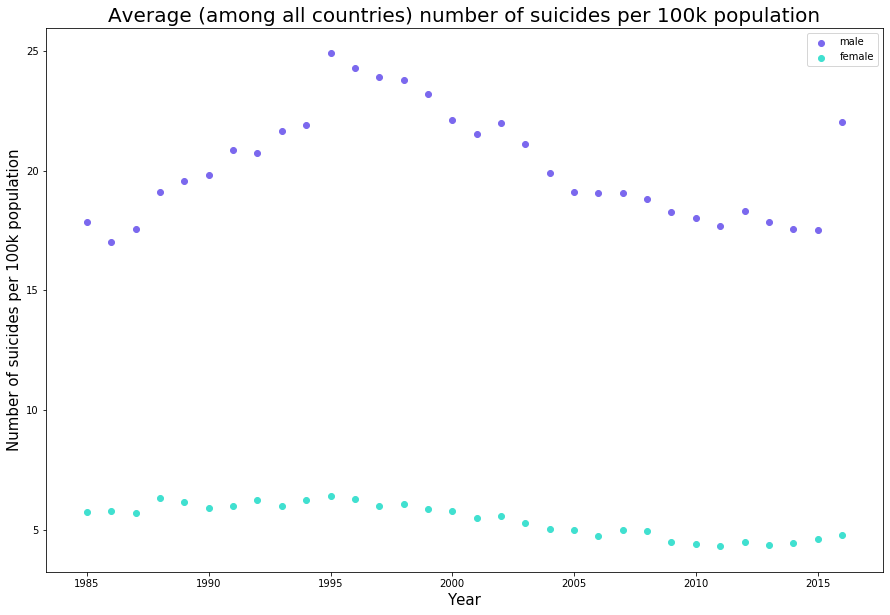

In [10]:
plt.scatter(j4_data_male.year, j4_data_male['suic rate'], color='#7B68EE', label='male')
plt.scatter(j4_data_female.year, j4_data_female['suic rate'], color='#40E0D0', label='female')
plt.xlabel('Year')
plt.ylabel('Number of suicides per 100k population')
plt.title('Average (among all countries) number of suicides per 100k population')
plt.legend()
plt.show()

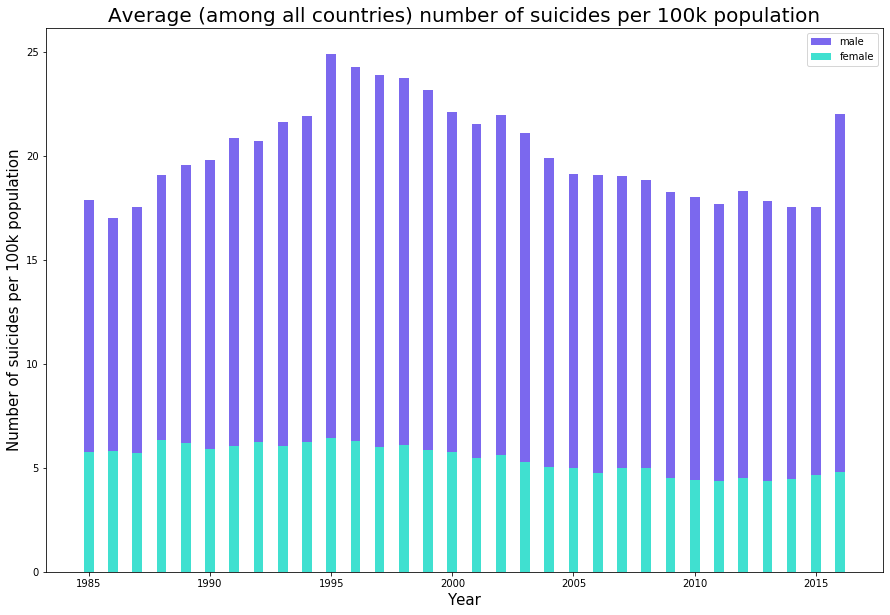

In [11]:
p1 = plt.bar(sorted(j4_data.year.unique()), j4_data[j4_data.sex == 1]['suic rate'], width=0.4, color='#7B68EE', label='male')
p2 = plt.bar(sorted(j4_data.year.unique()), j4_data[j4_data.sex == 0]['suic rate'], width=0.4, color='#40E0D0', label='female')
plt.xlabel('Year')
plt.ylabel('Number of suicides per 100k population')
plt.title('Average (among all countries) number of suicides per 100k population')
plt.legend()
plt.show()

## 1.

## 2. Boxplot gdp-country and boxplot suicides-country

In [12]:
j10 = list()
for country in sorted(data.country.unique()):
    a = data[data.country == country].gdp_per_capita.sum()
    b = data[data.country == country].suicides_no.sum()
    j10.append([country, a, b])
j10_data = pd.DataFrame(j10, columns=['country', 'gdp_per_capita', 'suic'])    

In [13]:
j10_data

,country,gdp_per_capita,suic
0,Albania,490788,1970
1,Antigua and Barbuda,3385212,11
2,Argentina,2944044,82219
3,Armenia,558428,1905
4,Aruba,4069236,101
...,...,...,...
96,United Arab Emirates,3035664,622
97,United Kingdom,11869908,136805
98,United States,14608296,1034013
99,Uruguay,2561016,13138


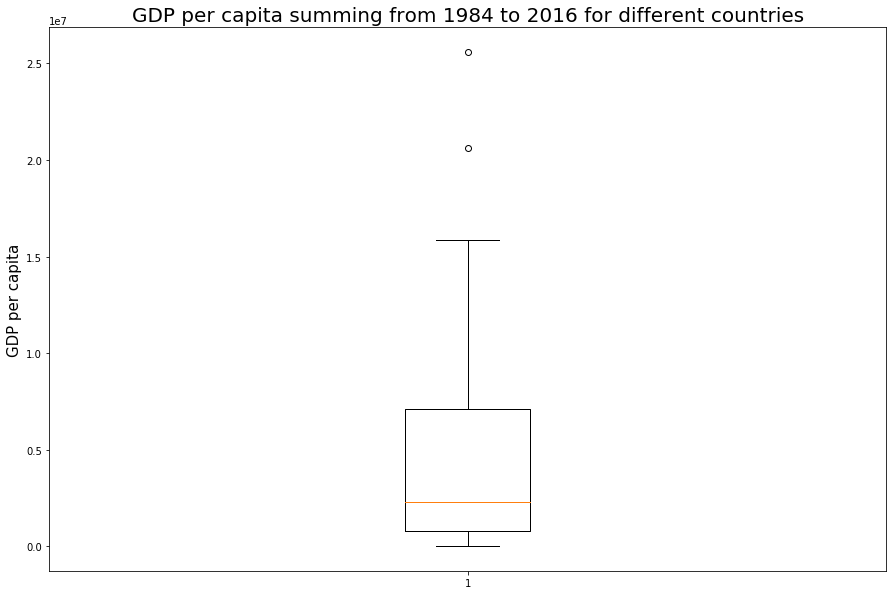

In [14]:
plt.boxplot(j10_data.gdp_per_capita)
plt.ylabel('GDP per capita')
plt.title('GDP per capita summing from 1984 to 2016 for different countries')
plt.show()

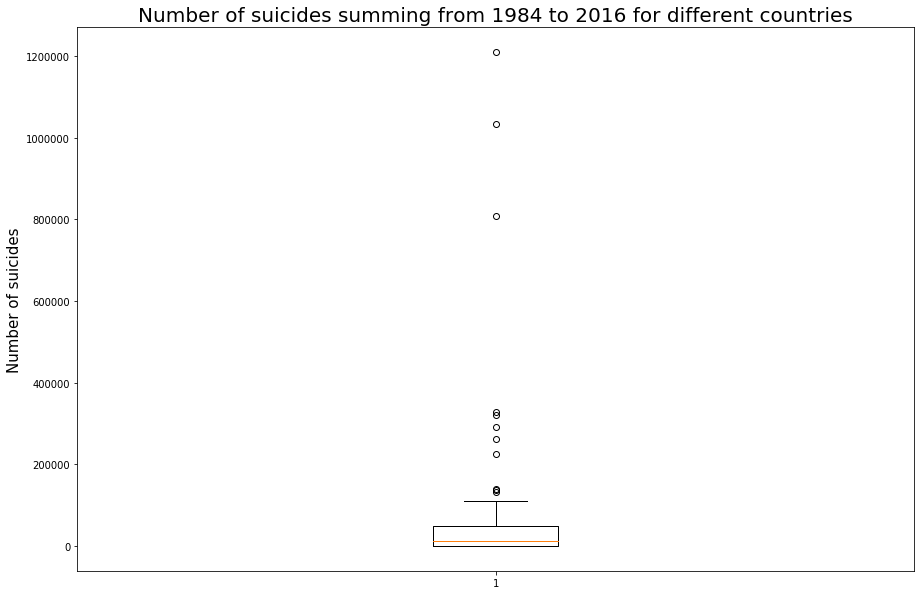

In [15]:
plt.boxplot(j10_data.suic)
plt.ylabel('Number of suicides')
plt.title('Number of suicides summing from 1984 to 2016 for different countries')
plt.show()

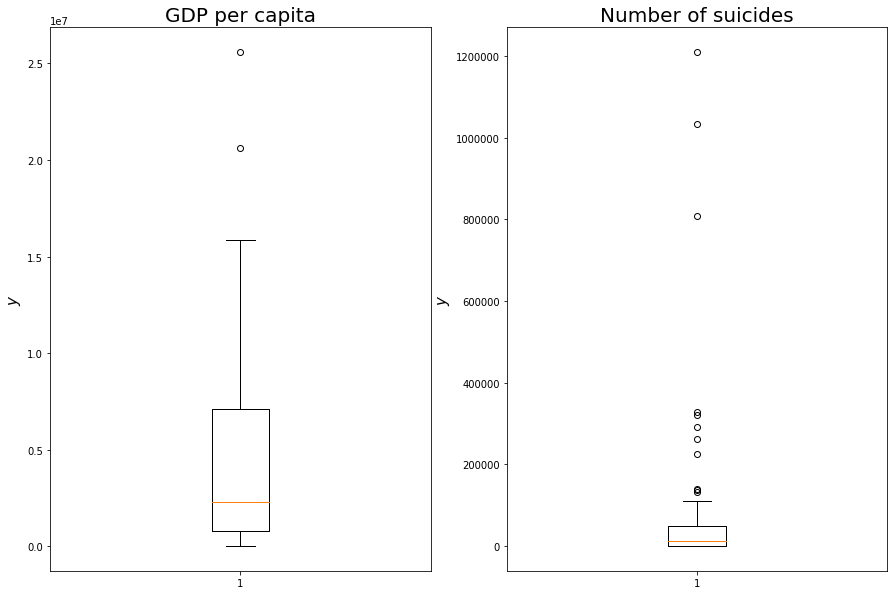

In [16]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))
 
ax1.boxplot(j10_data.gdp_per_capita)
ax1.set_title('GDP per capita')
#ax1.set_xlabel('$x$')
ax1.set_ylabel('$y$')
 
ax2.boxplot(j10_data.suic)
ax2.set_title('Number of suicides')
#ax2.set_xlabel('$x$')
ax2.set_ylabel('$y$')
 
 
plt.show()

In [17]:
# looking how to make 2 boxplots in Seaborn

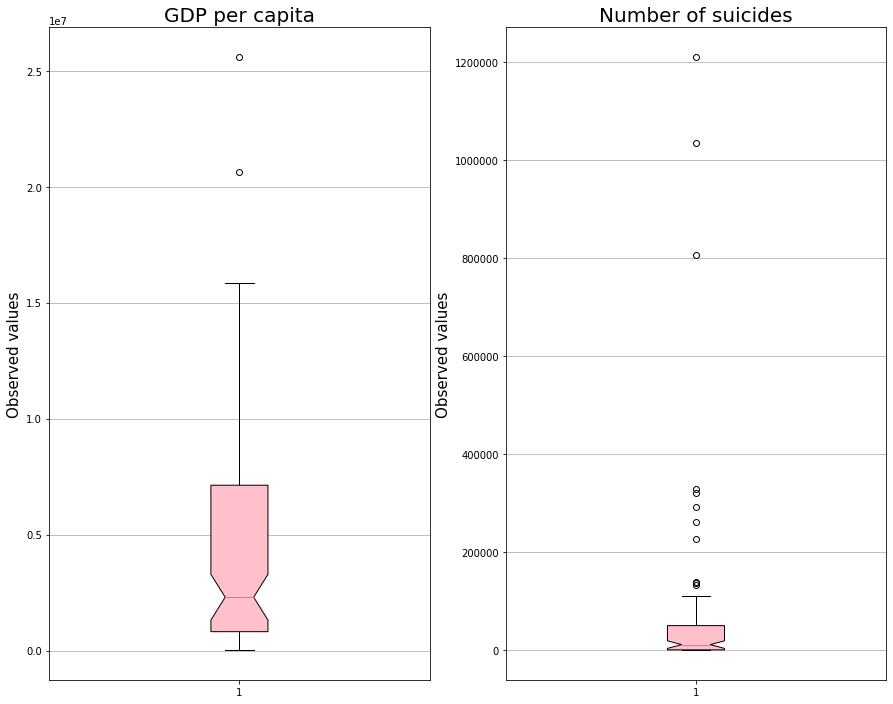

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 12))

bplot1 = axes[0].boxplot(j10_data.gdp_per_capita, notch=True, vert=True, patch_artist=True)  
axes[0].set_title('GDP per capita')

bplot2 = axes[1].boxplot(j10_data.suic, notch=True, vert=True, patch_artist=True)
axes[1].set_title('Number of suicides')

# fill with colors
colors = ['pink', 'lightblue', 'lightgreen']
for bplot in (bplot1, bplot2):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

# adding horizontal grid lines
for ax in axes:
    ax.yaxis.grid(True)
    #ax.set_xlabel('Three separate samples')
    ax.set_ylabel('Observed values')

plt.show()

## 3. Seaborn pairplot of 'HDI', 'number of suicides' and 'GDP per capita' sampled by 'sex'

In [19]:
j8 = list()
for i in range(len(data.sex)):
    j8.append([data.sex[i], data['suicides_no'][i], data['HDI_for_year'][i], data['gdp_per_capita'][i]])
j8_data = pd.DataFrame(j8, columns=['sex', 'suic', 'HDI', 'gdp'])

In [20]:
j8_data.sort_values(by='sex')

,sex,suic,HDI,gdp
13909,0,61,NaN,3110
15466,0,3,NaN,50788
15460,0,0,NaN,50260
15459,0,1,NaN,50260
15458,0,1,NaN,50260
...,...,...,...,...
8057,1,108,NaN,6832
8058,1,205,NaN,6832
11703,1,4,NaN,24107
4785,1,269,0.749,4003


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


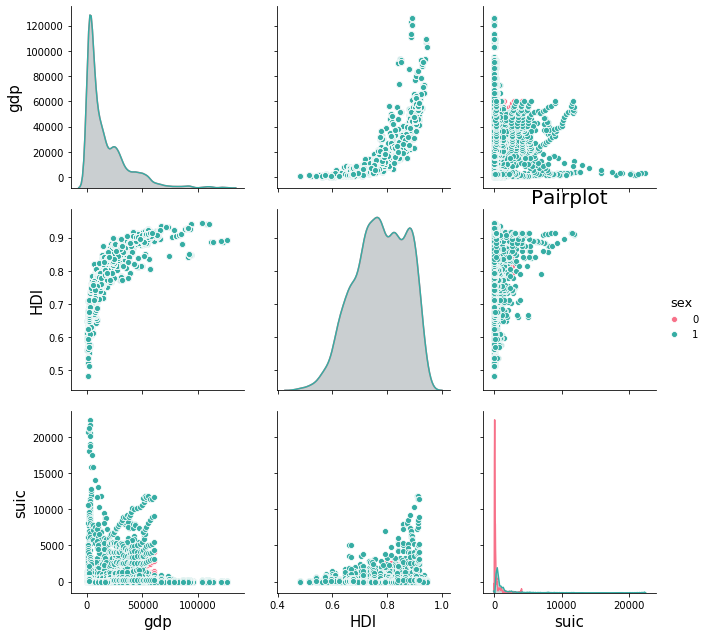

In [21]:
sns.pairplot(j8_data, vars=['gdp', 'HDI', 'suic'], height=3, hue='sex', palette="husl")
plt.title('Pairplot') # it puts title in not right place
plt.show()

## 4. Seaborn jointplot of relation between GDP per capita and suicides

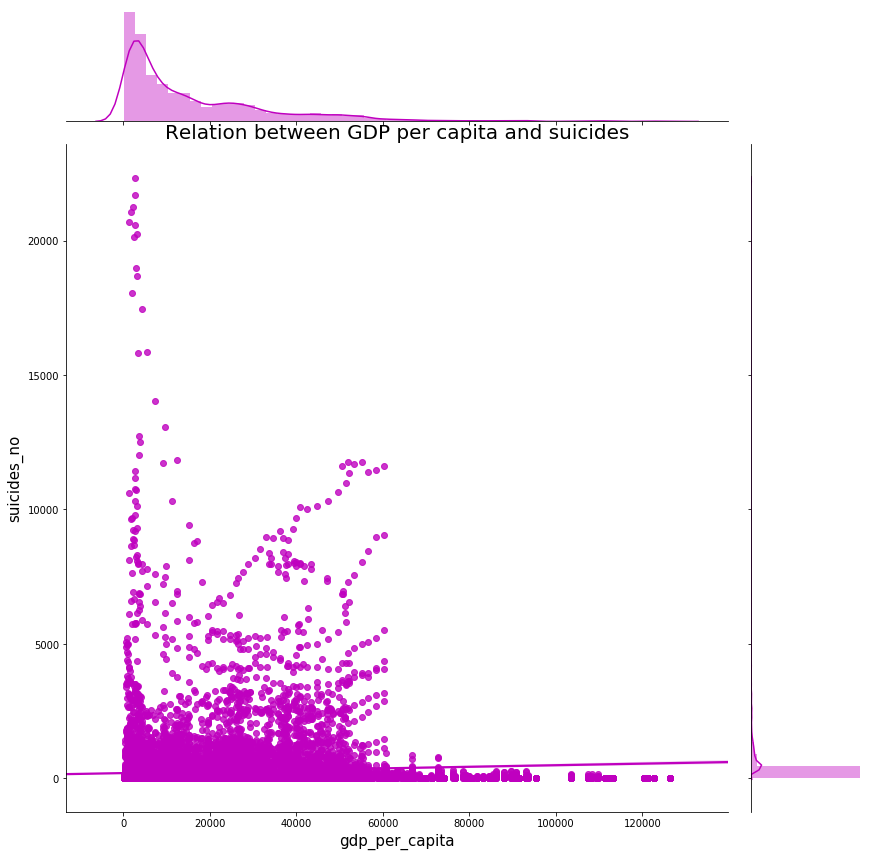

In [22]:
sns.jointplot(x=data.gdp_per_capita, y=data.suicides_no, color='m', height=12, data=data, kind='reg')
plt.title('Relation between GDP per capita and suicides')
plt.show()

## 5. Again my own graphs

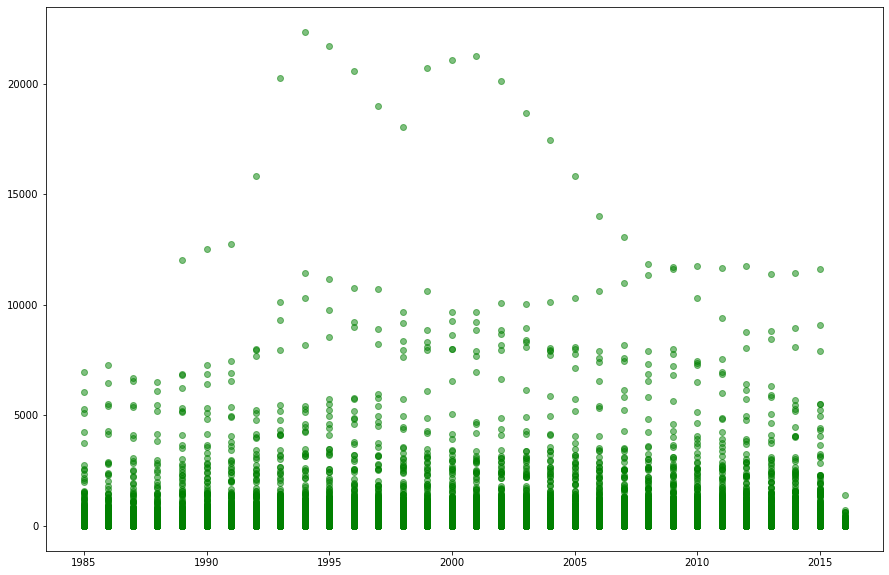

In [23]:
plt.scatter(data.year, data.suicides_no, color='g', alpha=0.5)
plt.show()

In [24]:
j9 = list()
for year in sorted(data.year.unique()):
    n = data[data.year == year].suicides_no.sum()
    j9.append([year, n])
j9_data = pd.DataFrame(j9, columns=['year', 'suic'])

<BarContainer object of 32 artists>

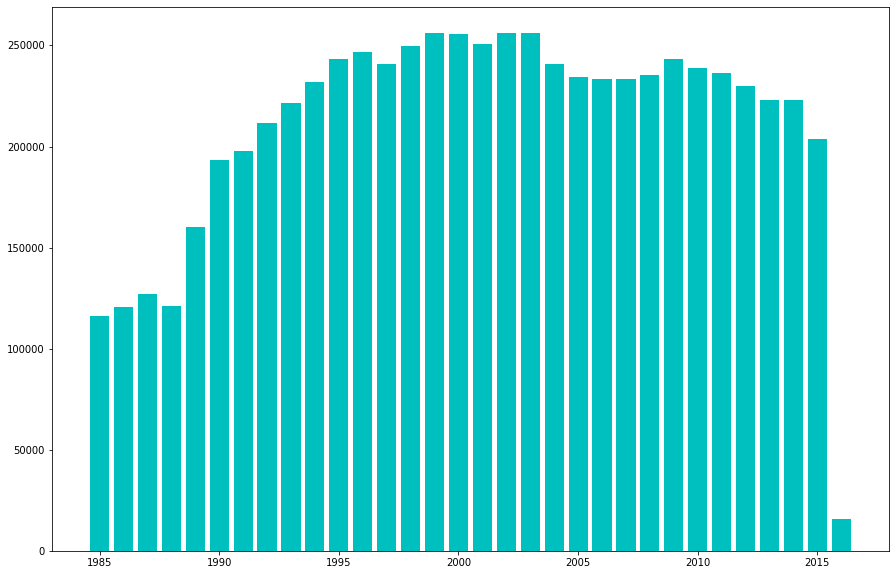

In [25]:
plt.bar(j9_data.year, j9_data.suic, color='c')

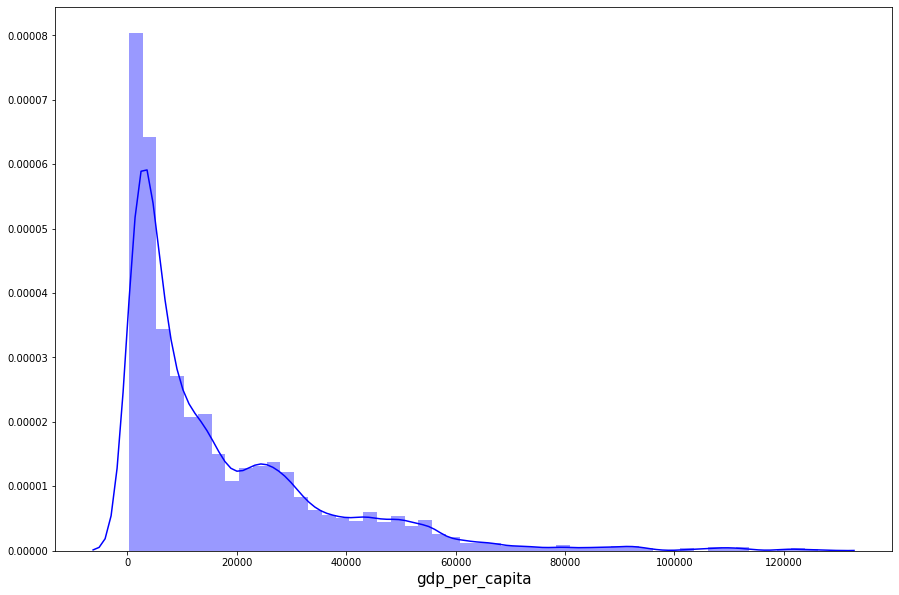

In [26]:
gr = sns.distplot(data.gdp_per_capita, color='b')
fig = gr.get_figure()

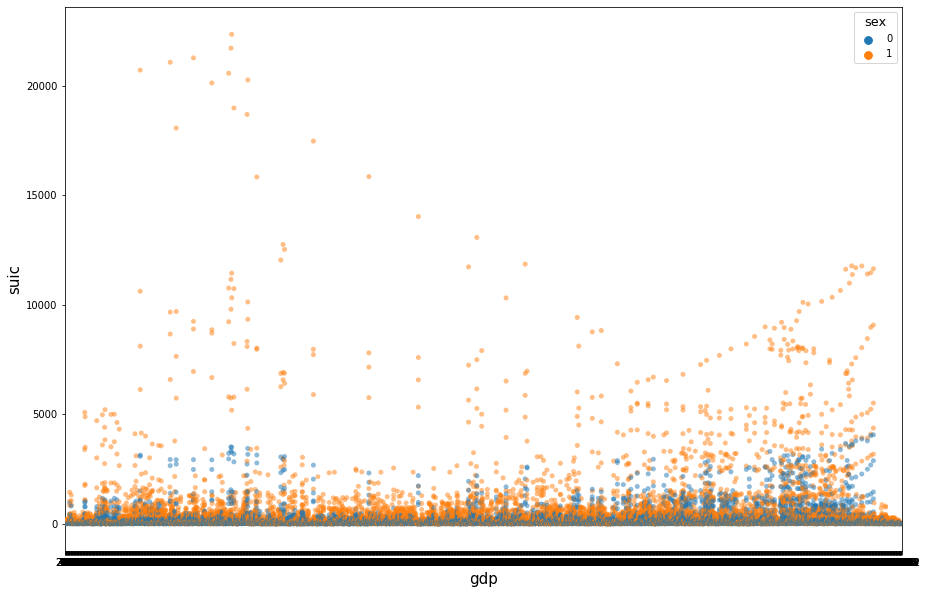

In [27]:
sns.stripplot(y=j8_data.suic, x=j8_data.gdp, 
                   data=j8_data, 
                   jitter=True, 
                   marker='o', 
                   alpha=0.5,
                   hue=j8_data.sex)
plt.show()